In [1]:
from lanefinder import Lanefinder
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
lanefinder = Lanefinder()
image = mpimg.imread("../test_images/test1.jpg")

Initializing lane finder ..
Done ...


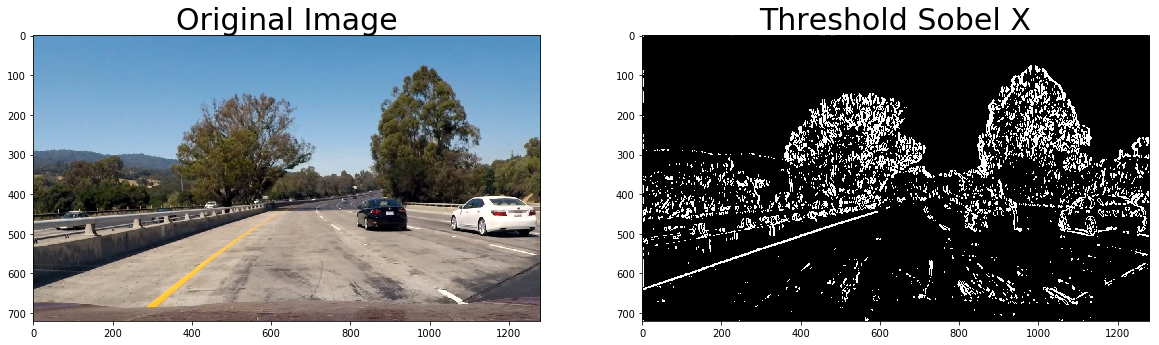

In [3]:
gradx=lanefinder.abs_sobel_threshold(image, orient='x',sobel_kernel=15, sobel_threshold=(20, 100))
#Plot
f, (ax11, ax12) = plt.subplots(1, 2, figsize=(20,10))
ax11.imshow(image)
ax11.set_title('Original Image', fontsize=30)
ax12.imshow(gradx, cmap='gray')
ax12.set_title('Threshold Sobel X', fontsize=30)
plt.show()

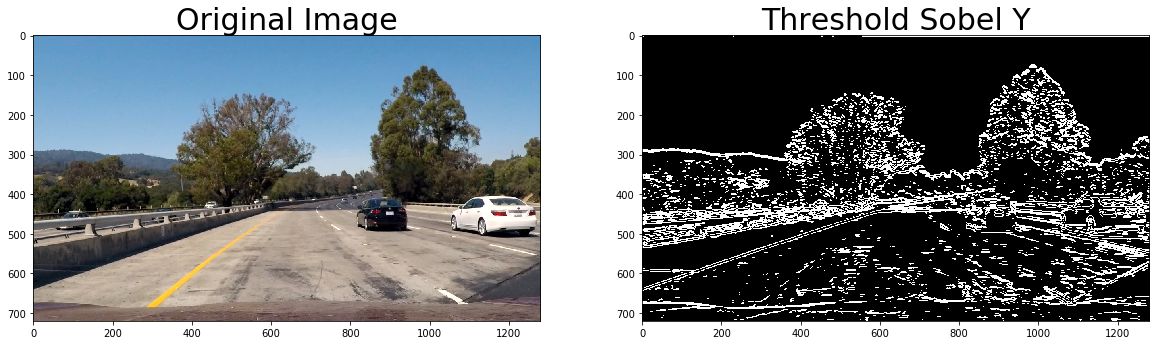

In [4]:
grady=lanefinder.abs_sobel_threshold(image, orient='y',sobel_kernel=15, sobel_threshold=(20, 100))
#Plot
f, (ax11, ax12) = plt.subplots(1, 2, figsize=(20,10))
ax11.imshow(image)
ax11.set_title('Original Image', fontsize=30)
ax12.imshow(grady, cmap='gray')
ax12.set_title('Threshold Sobel Y', fontsize=30)
plt.show()

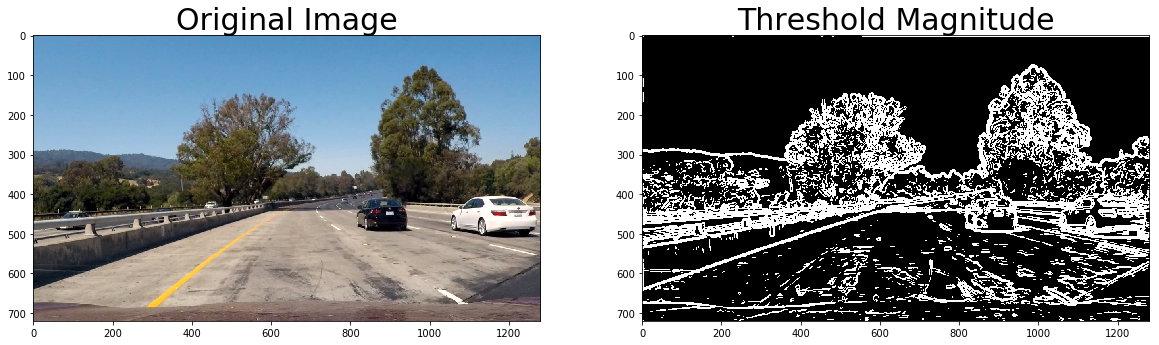

In [5]:
mag_binary=lanefinder.magnitude_threshold(image, sobel_kernel=15, magnitude_threshold=(20, 200))
#Plot
f, (ax11, ax12) = plt.subplots(1, 2, figsize=(20,10))
ax11.imshow(image)
ax11.set_title('Original Image', fontsize=30)
ax12.imshow(mag_binary, cmap='gray')
ax12.set_title('Threshold Magnitude', fontsize=30)
plt.show()

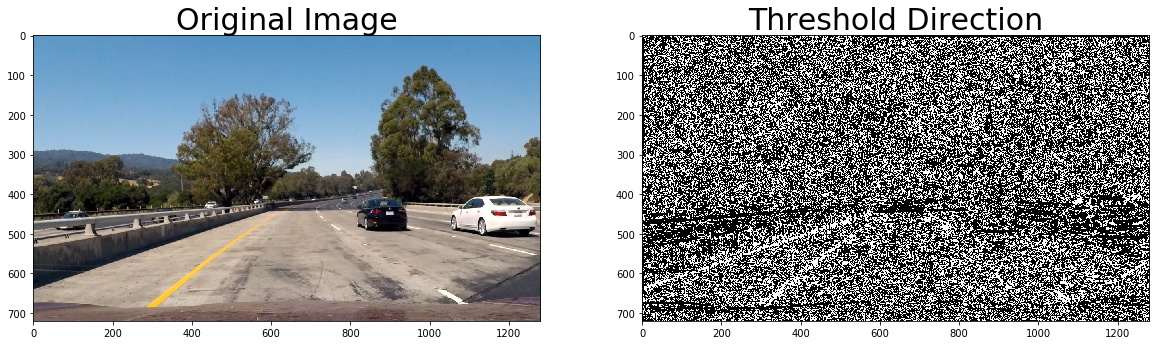

In [6]:
dir_binary=lanefinder.direction_threshold(image, sobel_kernel=9, direction_threshold=(0.7, 1.3))
#Plot
f, (ax11, ax12) = plt.subplots(1, 2, figsize=(20,10))
ax11.imshow(image)
ax11.set_title('Original Image', fontsize=30)
ax12.imshow(dir_binary, cmap='gray')
ax12.set_title('Threshold Direction', fontsize=30)
plt.show()

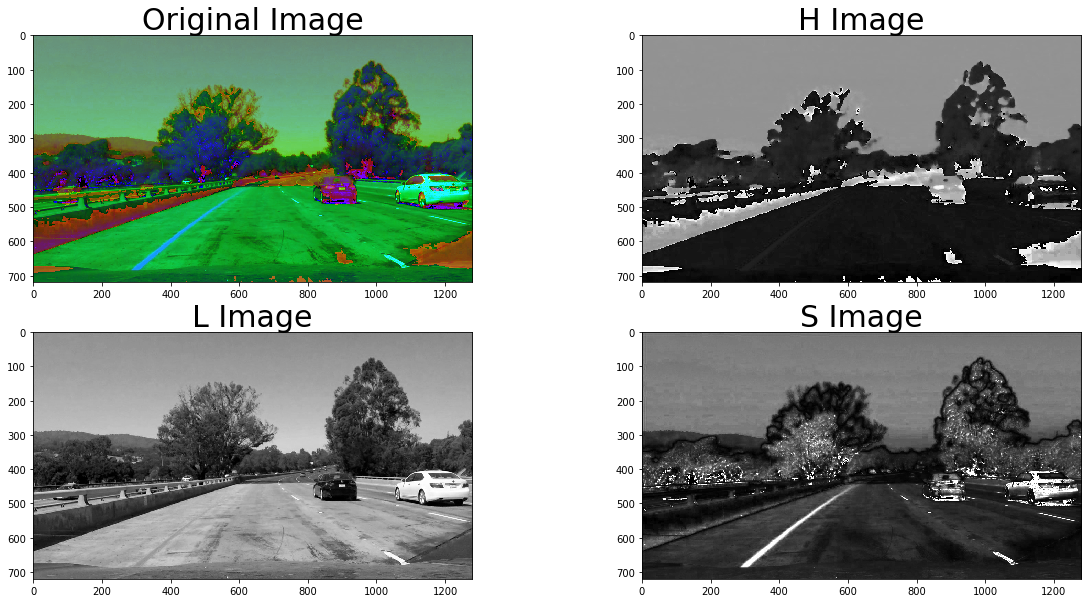

In [7]:
f, ((ax11, ax12), (ax21, ax22)) = plt.subplots(2, 2, figsize=(20,10))
hls = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
ax11.imshow(hls)
ax11.set_title('Original Image', fontsize=30)
ax12.imshow(hls[:,:,0], cmap='gray')
ax12.set_title('H Image', fontsize=30)          
ax21.imshow(hls[:,:,1], cmap='gray')
ax21.set_title('L Image', fontsize=30)
ax22.imshow(hls[:,:,2], cmap='gray')
ax22.set_title('S Image', fontsize=30)
plt.show()

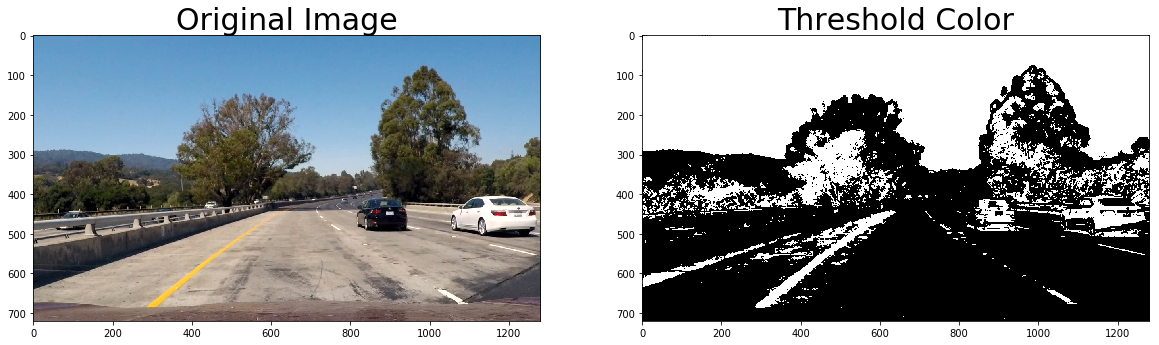

In [8]:
hls_binary=lanefinder.hls_color_threshold(image, s_threshold=(70, 255))
#Plot
f, (ax11, ax12) = plt.subplots(1, 2, figsize=(20,10))
ax11.imshow(image)
ax11.set_title('Original Image', fontsize=30)
ax12.imshow(hls_binary, cmap='gray')
ax12.set_title('Threshold Color', fontsize=30)
plt.show()

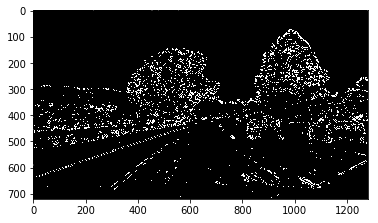

In [9]:
combined_binary = lanefinder.combined_threshold(gradx, grady, mag_binary, dir_binary, hls_binary)
plt.imshow(combined_binary, cmap='gray')